In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
yf.Ticker('AAPL').info # basic info about Apple

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscriptio

In [55]:
# Lets compare some stocks
tickers = ['AAPL','MSFT','IBM'] 

In [56]:
infos = []

for i in tickers:
    infos.append(yf.Ticker(i).info)

In [57]:
infos # we will have a list containing three dictionaries containing information

[{'address1': 'One Apple Park Way',
  'city': 'Cupertino',
  'state': 'CA',
  'zip': '95014',
  'country': 'United States',
  'phone': '408 996 1010',
  'website': 'https://www.apple.com',
  'industry': 'Consumer Electronics',
  'industryDisp': 'Consumer Electronics',
  'sector': 'Technology',
  'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game 

In [58]:
fundamentals = ['address1', 'dividendYield','marketCap','beta','forwardPE']

In [60]:
df = pd.DataFrame(infos)

In [61]:
df

,address1,city,state,zip,country,phone,website,industry,industryDisp,sector,...,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,fax
0,One Apple Park Way,Cupertino,CA,95014,United States,408 996 1010,https://www.apple.com,Consumer Electronics,Consumer Electronics,Technology,...,83796623360,109583998976,0.000,-0.025,0.43181,0.32145,0.29163,USD,2.5276,NaN
1,One Microsoft Way,Redmond,WA,98052-6399,United States,425 882 8080,https://www.microsoft.com,Software—Infrastructure,Software—Infrastructure,Technology,...,42964873216,83441000448,0.104,0.071,0.68522,0.48210,0.41415,USD,2.4511,425 706 7329
2,One New Orchard Road,Armonk,NY,10504,United States,914 499 1900,https://www.ibm.com,Information Technology Services,Information Technology Services,Technology,...,9955000320,10961000448,0.253,0.004,0.54243,0.20870,0.13244,USD,2.1778,NaN


In [62]:
df = df.set_index('symbol')

In [63]:
# Now we want to filter this dataframe according to our required fundamentals
df.columns.isin(fundamentals) # All boolean values will be obtained

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [64]:
df.columns[df.columns.isin(fundamentals)] # Obtaining the names of columns

Index(['address1', 'dividendYield', 'beta', 'forwardPE', 'marketCap'], dtype='object')

In [65]:
df[df.columns[df.columns.isin(fundamentals)]] # Obtaining a proper dataframe
# 0: AAPL
# 1: MSFT
# 2: IBM

,address1,dividendYield,beta,forwardPE,marketCap
symbol,,,,,
AAPL,One Apple Park Way,0.0052,1.289436,28.532724,2965336227840
MSFT,One Microsoft Way,0.0082,0.927464,30.859362,2546347802624
IBM,One New Orchard Road,0.0506,0.852464,13.022045,122319003648


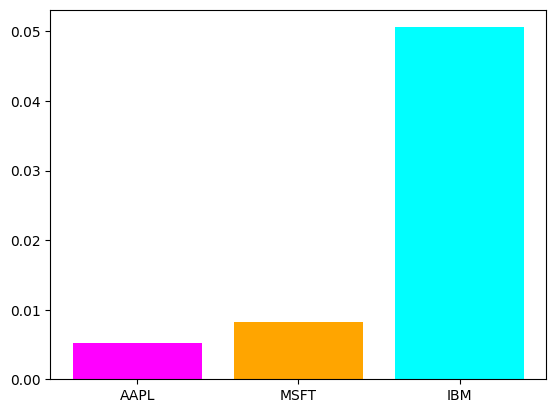

In [66]:
plt.bar(df.index, df.dividendYield, color=('magenta','orange','cyan'))
plt.show()

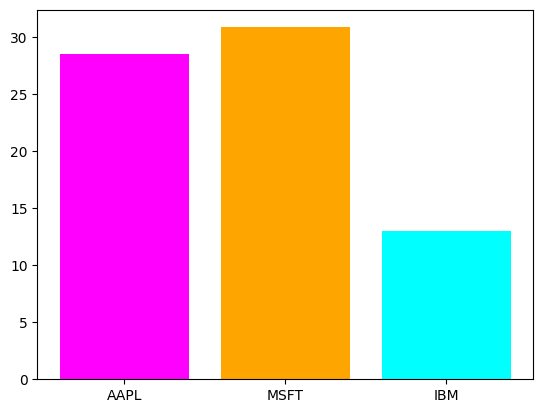

In [67]:
plt.bar(df.index, df.forwardPE, color=('magenta','orange','cyan'))
plt.show()

In [68]:
pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.41%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.02%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,5.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.84%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,NaN,4.52%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,3.50%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.96%
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.22%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,1.89%


In [69]:
df_two = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

In [70]:
df_two

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.41%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.02%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,5.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.84%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,NaN,4.52%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,3.50%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.96%
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.22%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,1.89%


In [71]:
tickers = df_two.Symbol.to_list()

In [72]:
tickers # List of symbols

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT']

In [73]:
infos = []

for i in tickers:
    infos.append(yf.Ticker(i).info)

In [74]:
infos # This list contains 30 dictionaries with all the relevant fundamental information

[{'address1': '3M Center',
  'city': 'Saint Paul',
  'state': 'MN',
  'zip': '55144-1000',
  'country': 'United States',
  'phone': '651 733 1110',
  'website': 'https://www.3m.com',
  'industry': 'Conglomerates',
  'industryDisp': 'Conglomerates',
  'sector': 'Industrials',
  'longBusinessSummary': '3M Company provides diversified technology services in the United States and internationally. The company operates through four segments: Safety and Industrial; Transportation and Electronics; Health Care; and Consumer. The Safety and Industrial segment offers industrial abrasives and finishing for metalworking applications; autobody repair solutions; closure systems for personal hygiene products, masking, and packaging materials; electrical products and materials for construction and maintenance, power distribution, and electrical original equipment manufacturers; structural adhesives and tapes; respiratory, hearing, eye, and fall protection solutions; and natural and color-coated mineral

In [75]:
df_two = pd.DataFrame(infos)

In [76]:
df_two

,address1,city,state,zip,country,phone,website,industry,industryDisp,sector,...,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,fax,address2,industrySymbol
0,3M Center,Saint Paul,MN,55144-1000,United States,651 733 1110,https://www.3m.com,Conglomerates,Conglomerates,Industrials,...,-0.221,-0.090,0.42547,0.20460,0.14962,USD,4.4418,NaN,NaN,NaN
1,200 Vesey Street,New York,NY,10285,United States,212 640 2000,https://www.americanexpress.com,Credit Services,Credit Services,Financial Services,...,-0.121,0.124,0.56047,0.00000,0.18372,USD,1.1948,NaN,NaN,NaN
2,One Amgen Center Drive,Thousand Oaks,CA,91320-1799,United States,805 447 1000,https://www.amgen.com,Drug Manufacturers—General,Drug Manufacturers—General,Healthcare,...,0.970,-0.021,0.74933,0.50103,0.36831,USD,1.2388,805 447 1010,NaN,NaN
3,One Apple Park Way,Cupertino,CA,95014,United States,408 996 1010,https://www.apple.com,Consumer Electronics,Consumer Electronics,Technology,...,0.000,-0.025,0.43181,0.32145,0.29163,USD,2.5276,NaN,NaN,NaN
4,929 Long Bridge Drive,Arlington,VA,22202,United States,703 465 3500,https://www.boeing.com,Aerospace & Defense,Aerospace & Defense,Industrials,...,NaN,0.281,0.09683,0.02899,0.00135,USD,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,USD,1.4806,NaN,NaN,NaN
6,6001 Bollinger Canyon Road,San Ramon,CA,94583-2324,United States,925 842 1000,https://www.chevron.com,Oil & Gas Integrated,Oil & Gas Integrated,Energy,...,0.075,-0.056,0.39610,0.24937,0.18397,USD,NaN,NaN,NaN,NaN
7,170 West Tasman Drive,San Jose,CA,95134-1706,United States,408 526 4000,https://www.cisco.com,Communication Equipment,Communication Equipment,Technology,...,0.068,0.135,0.61989,0.29517,0.26504,USD,2.0668,NaN,NaN,NaN
8,One Coca-Cola Plaza,Atlanta,GA,30313,United States,404 676 2121,https://www.coca-colacompany.com,Beverages—Non-Alcoholic,Beverages—Non—Alcoholic,Consumer Defensive,...,0.122,0.047,0.58094,0.30938,0.28129,USD,3.3699,NaN,NaN,NaN
9,500 South Buena Vista Street,Burbank,CA,91521,United States,818 560 1000,https://www.thewaltdisneycompany.com,Entertainment,Entertainment,Communication Services,...,1.675,0.133,0.33041,0.14561,0.08556,USD,0.7247,NaN,NaN,NaN


In [82]:
df_two = df_two.set_index('symbol')

In [83]:
df_two

,address1,city,state,zip,country,phone,website,industry,industryDisp,sector,...,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,fax,address2,industrySymbol
symbol,,,,,,,,,,,,,,,,,,,,,
MMM,3M Center,Saint Paul,MN,55144-1000,United States,651 733 1110,https://www.3m.com,Conglomerates,Conglomerates,Industrials,...,-0.221,-0.090,0.42547,0.20460,0.14962,USD,4.4418,NaN,NaN,NaN
AXP,200 Vesey Street,New York,NY,10285,United States,212 640 2000,https://www.americanexpress.com,Credit Services,Credit Services,Financial Services,...,-0.121,0.124,0.56047,0.00000,0.18372,USD,1.1948,NaN,NaN,NaN
AMGN,One Amgen Center Drive,Thousand Oaks,CA,91320-1799,United States,805 447 1000,https://www.amgen.com,Drug Manufacturers—General,Drug Manufacturers—General,Healthcare,...,0.970,-0.021,0.74933,0.50103,0.36831,USD,1.2388,805 447 1010,NaN,NaN
AAPL,One Apple Park Way,Cupertino,CA,95014,United States,408 996 1010,https://www.apple.com,Consumer Electronics,Consumer Electronics,Technology,...,0.000,-0.025,0.43181,0.32145,0.29163,USD,2.5276,NaN,NaN,NaN
BA,929 Long Bridge Drive,Arlington,VA,22202,United States,703 465 3500,https://www.boeing.com,Aerospace & Defense,Aerospace & Defense,Industrials,...,NaN,0.281,0.09683,0.02899,0.00135,USD,NaN,NaN,NaN,NaN
CAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,USD,1.4806,NaN,NaN,NaN
CVX,6001 Bollinger Canyon Road,San Ramon,CA,94583-2324,United States,925 842 1000,https://www.chevron.com,Oil & Gas Integrated,Oil & Gas Integrated,Energy,...,0.075,-0.056,0.39610,0.24937,0.18397,USD,NaN,NaN,NaN,NaN
CSCO,170 West Tasman Drive,San Jose,CA,95134-1706,United States,408 526 4000,https://www.cisco.com,Communication Equipment,Communication Equipment,Technology,...,0.068,0.135,0.61989,0.29517,0.26504,USD,2.0668,NaN,NaN,NaN
KO,One Coca-Cola Plaza,Atlanta,GA,30313,United States,404 676 2121,https://www.coca-colacompany.com,Beverages—Non-Alcoholic,Beverages—Non—Alcoholic,Consumer Defensive,...,0.122,0.047,0.58094,0.30938,0.28129,USD,3.3699,NaN,NaN,NaN


In [84]:
df_two['dividendYield'].nlargest(5) # 5 highest dividend payers

symbol
VZ     0.0728
WBA    0.0608
MMM    0.0597
DOW    0.0540
IBM    0.0506
Name: dividendYield, dtype: float64

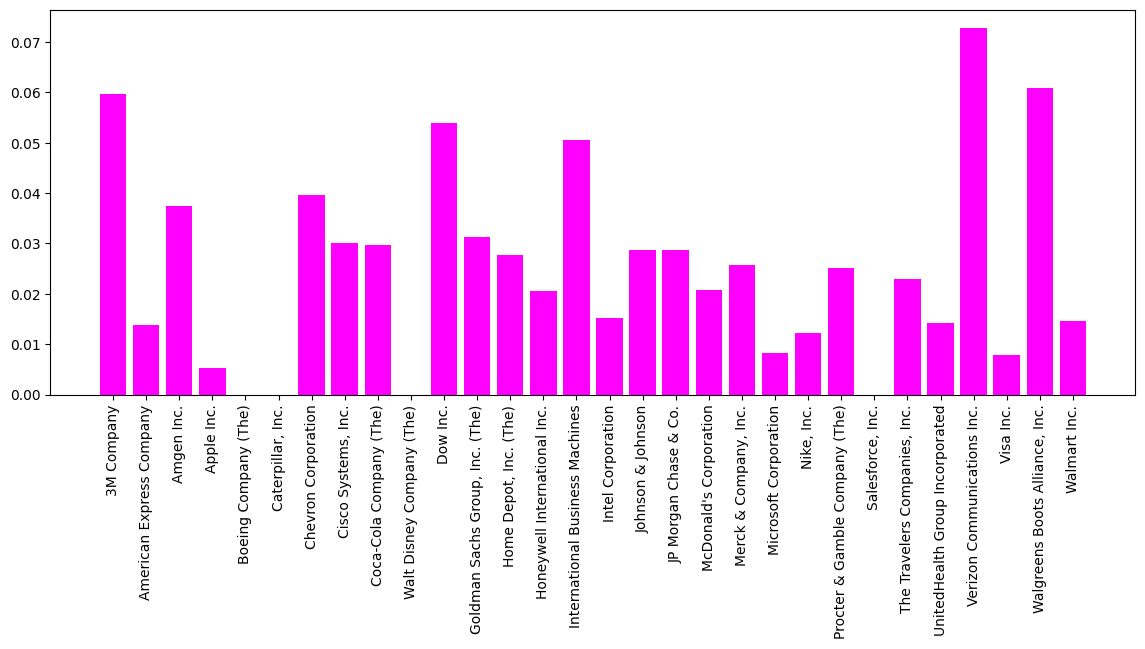

In [89]:
# Lets Visualize all the dividends
plt.figure(figsize=(14,5))
plt.bar(df_two['shortName'],df_two['dividendYield'], color='magenta')
plt.xticks(rotation=90)
plt.show()